[[ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]
 [ 0  2  4  6  8 10 12 14]]


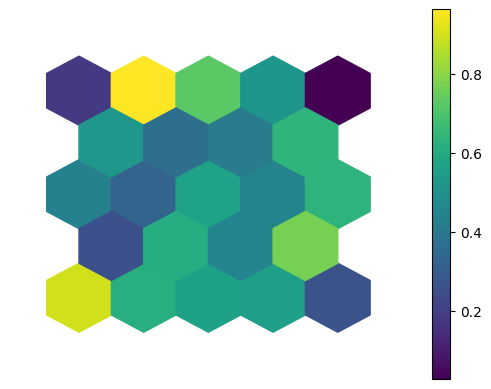

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 

A = np.random.random((10, 10))
X, Y = np.meshgrid(range(A.shape[0]), range(A.shape[-1]))
X, Y = X*2, Y*2

print(X)

# Turn this into a hexagonal grid
for i, k in enumerate(X):
    if i % 2 == 1:
        X[i] += 1
        Y[:,i] += 1

fig, ax = plt.subplots()
im = ax.hexbin(
    X.reshape(-1), 
    Y.reshape(-1), 
    C=A.reshape(-1), 
    gridsize=int(A.shape[0]/2)
)

# the rest of the code is adjustable for best output
ax.set_aspect(0.8)
ax.set(xlim=(-4, X.max()+4,), ylim=(-4, Y.max()+4))
ax.axis(False)
plt.colorbar(im)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

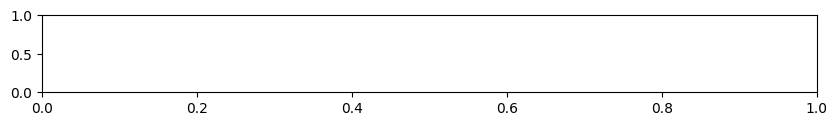

In [73]:
# X = np.ones((10,3))
# Y = np.ones((10,3))
# C = np.ones((10,3))

A = np[

fig, ax = plt.subplots(figsize=(10,1))
ax.hexbin(X, Y, C, gridsize=(10, 1))
ax.set_aspect(0.1)
ax.axis('off')
#ax.set(xlim=(-1, X.max()+1,), ylim=(-1, Y.max()+1))